In [2]:
import pandas as pd

In [3]:
df=pd.DataFrame(data={"Pais":['Mexico','Argentina','Espana','Colombia'],"Poblacion":[127212000, 45167000, 47099000, 48922000]})
df

,Pais,Poblacion
0,Mexico,127212000
1,Argentina,45167000
2,Espana,47099000
3,Colombia,48922000


In [4]:
df.sort_values(["Poblacion"], ascending=True)

,Pais,Poblacion
1,Argentina,45167000
2,Espana,47099000
3,Colombia,48922000
0,Mexico,127212000


In [5]:
#Añadir columna nueva
df["Superficie"] = [1964375, 2780400, 505944, 1142748]
df

,Pais,Poblacion,Superficie
0,Mexico,127212000,1964375
1,Argentina,45167000,2780400
2,Espana,47099000,505944
3,Colombia,48922000,1142748


In [6]:
#Asigno mismo valor a todas las filas en una columna nueva
df['Deporte']= 'Futbol'
df

,Pais,Poblacion,Superficie,Deporte
0,Mexico,127212000,1964375,Futbol
1,Argentina,45167000,2780400,Futbol
2,Espana,47099000,505944,Futbol
3,Colombia,48922000,1142748,Futbol


In [7]:
#Borrar columna
df = df.drop(['Deporte'],axis=1)
df

,Pais,Poblacion,Superficie
0,Mexico,127212000,1964375
1,Argentina,45167000,2780400
2,Espana,47099000,505944
3,Colombia,48922000,1142748


In [8]:
df.drop(['Superficie','Pais'], axis=1)

,Poblacion
0,127212000
1,45167000
2,47099000
3,48922000


In [9]:
df

,Pais,Poblacion,Superficie
0,Mexico,127212000,1964375
1,Argentina,45167000,2780400
2,Espana,47099000,505944
3,Colombia,48922000,1142748


In [10]:
cantidad_filas = len(df) # obtengo la cantidad de filas
cantidad_filas

4

In [11]:
df.loc[cantidad_filas] = ["Benezuela", 0, 916445] # Está mal escrito el pais! (lo sé)
df

,Pais,Poblacion,Superficie
0,Mexico,127212000,1964375
1,Argentina,45167000,2780400
2,Espana,47099000,505944
3,Colombia,48922000,1142748
4,Benezuela,0,916445


In [12]:
df.loc[4] = ["Venezuela", 0, 916445]
df

,Pais,Poblacion,Superficie
0,Mexico,127212000,1964375
1,Argentina,45167000,2780400
2,Espana,47099000,505944
3,Colombia,48922000,1142748
4,Venezuela,0,916445


In [13]:
df.at[4,'Poblacion'] = 32423000
df

,Pais,Poblacion,Superficie
0,Mexico,127212000,1964375
1,Argentina,45167000,2780400
2,Espana,47099000,505944
3,Colombia,48922000,1142748
4,Venezuela,32423000,916445


In [14]:
df.drop([3])

,Pais,Poblacion,Superficie
0,Mexico,127212000,1964375
1,Argentina,45167000,2780400
2,Espana,47099000,505944
4,Venezuela,32423000,916445


In [15]:
#Setear variable y mostrar
mas_de_46 = df[ df['Poblacion'] > 46000000 ]
mas_de_46

,Pais,Poblacion,Superficie
0,Mexico,127212000,1964375
2,Espana,47099000,505944
3,Colombia,48922000,1142748


In [16]:
# Pais con mas de 6 letras
nombre_largo = df[ df['Pais'].str.len() > 6 ]
nombre_largo

,Pais,Poblacion,Superficie
1,Argentina,45167000,2780400
3,Colombia,48922000,1142748
4,Venezuela,32423000,916445


In [17]:
# Obtener el indice de una fila
por_nombre = df[ df['Pais'] == 'Colombia' ]
por_nombre.index.tolist()[0]

3

In [18]:
# agregamos en una nueva columna el ratio de habitantes por superficie
df['Habit_x_km2'] = (df['Poblacion'] / df['Superficie']).astype(int)
df.sort_values(['Habit_x_km2'])

,Pais,Poblacion,Superficie,Habit_x_km2
1,Argentina,45167000,2780400,16
4,Venezuela,32423000,916445,35
3,Colombia,48922000,1142748,42
0,Mexico,127212000,1964375,64
2,Espana,47099000,505944,93


In [19]:
# Creamos y ejecutamos una funcion

def crear_codigo(name):
    name = name.upper() # paso a mayusculas
    name = name[0:4]    # primeros 4 char
    return name

df['Codigo'] = df['Pais'].apply(crear_codigo)
df

,Pais,Poblacion,Superficie,Habit_x_km2,Codigo
0,Mexico,127212000,1964375,64,MEXI
1,Argentina,45167000,2780400,16,ARGE
2,Espana,47099000,505944,93,ESPA
3,Colombia,48922000,1142748,42,COLO
4,Venezuela,32423000,916445,35,VENE


In [20]:
# Aplicamos una función enviando cada fila
def categoria(fila):
    pob = fila['Poblacion']
    habit = fila['Habit_x_km2']
    if pob > 46000000:
        if habit <50:
            return 'A'
        else:
            return 'B'
        
    return 'C'

df['Categoria'] = df.apply(categoria, axis=1)
df

,Pais,Poblacion,Superficie,Habit_x_km2,Codigo,Categoria
0,Mexico,127212000,1964375,64,MEXI,B
1,Argentina,45167000,2780400,16,ARGE,C
2,Espana,47099000,505944,93,ESPA,B
3,Colombia,48922000,1142748,42,COLO,A
4,Venezuela,32423000,916445,35,VENE,C


In [21]:
# Aplicar enviando algunas columnas como parámetros
def asigna_color(codigo, categoria):
    if categoria=='A':
        return 'rojo'
    if codigo == 'ESPA':
        return 'verde'
    return 'azul'

df['color'] = df.apply(lambda x: asigna_color(x['Codigo'],x['Categoria']), axis=1);
df

,Pais,Poblacion,Superficie,Habit_x_km2,Codigo,Categoria,color
0,Mexico,127212000,1964375,64,MEXI,B,azul
1,Argentina,45167000,2780400,16,ARGE,C,azul
2,Espana,47099000,505944,93,ESPA,B,verde
3,Colombia,48922000,1142748,42,COLO,A,rojo
4,Venezuela,32423000,916445,35,VENE,C,azul


In [22]:
#Mapear valores
df['mapeo_color'] = df['color'].map( {'azul': 0, 'rojo': 1, 'verde': 2} ).astype(int)
df

,Pais,Poblacion,Superficie,Habit_x_km2,Codigo,Categoria,color,mapeo_color
0,Mexico,127212000,1964375,64,MEXI,B,azul,0
1,Argentina,45167000,2780400,16,ARGE,C,azul,0
2,Espana,47099000,505944,93,ESPA,B,verde,2
3,Colombia,48922000,1142748,42,COLO,A,rojo,1
4,Venezuela,32423000,916445,35,VENE,C,azul,0


In [23]:
# Reordenar columnas
df = df[ ['Codigo','Pais','Poblacion','Categoria','Superficie','Habit_x_km2'] ]
df

,Codigo,Pais,Poblacion,Categoria,Superficie,Habit_x_km2
0,MEXI,Mexico,127212000,B,1964375,64
1,ARGE,Argentina,45167000,C,2780400,16
2,ESPA,Espana,47099000,B,505944,93
3,COLO,Colombia,48922000,A,1142748,42
4,VENE,Venezuela,32423000,C,916445,35


In [24]:
#supongamos que tenemos otra tabla:
df_otros = pd.DataFrame(data={"Pais":['Brasil','Chile'],
                        "Poblacion":[210688000, 19241000],
                        "Superficie":[8515770,56102]})
df_otros

,Pais,Poblacion,Superficie
0,Brasil,210688000,8515770
1,Chile,19241000,56102


In [25]:
df.append(df_otros, ignore_index=True, sort=True)

,Categoria,Codigo,Habit_x_km2,Pais,Poblacion,Superficie
0,B,MEXI,64.0,Mexico,127212000,1964375
1,C,ARGE,16.0,Argentina,45167000,2780400
2,B,ESPA,93.0,Espana,47099000,505944
3,A,COLO,42.0,Colombia,48922000,1142748
4,C,VENE,35.0,Venezuela,32423000,916445
5,NaN,NaN,NaN,Brasil,210688000,8515770
6,NaN,NaN,NaN,Chile,19241000,56102


In [26]:
# agrupo por categoria y sumo cuantos hay de cada una
grupo2 = df.groupby(['Categoria']).size()
grupo2

Categoria
A    1
B    2
C    2
dtype: int64

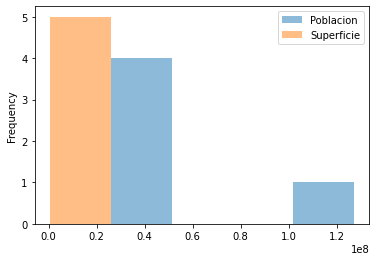

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

df[['Poblacion','Superficie']].plot.hist(bins=5,alpha=0.5)
plt.show()

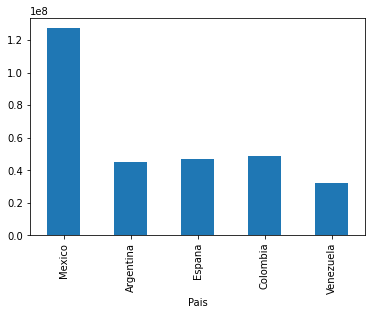

In [28]:
df.set_index('Pais')['Poblacion'].plot(kind='bar');

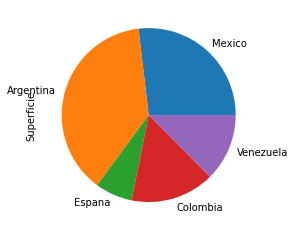

In [29]:
df.set_index('Pais')['Superficie'].plot.pie();

In [30]:
#Iterar un dataframe
for index, row in df.iterrows():    
    print(row['Pais'])

Mexico
Argentina
Espana
Colombia
Venezuela


In [31]:
# Obtener sumatoria, media y cantidad de una columna
print(df['Habit_x_km2'].mean())
print(df['Habit_x_km2'].sum())
print(df['Habit_x_km2'].count())
print(df['Habit_x_km2'].min())
print(df['Habit_x_km2'].max())

50.0
250
5
16
93


In [32]:
#cantidad de filas
len(df)

5

In [33]:
# dimensiones del dataframe (filas, columnas)
df.shape

(5, 6)

In [34]:
# Revisar si tenemos nulos en la tabla
df.isnull().sum()

Codigo         0
Pais           0
Poblacion      0
Categoria      0
Superficie     0
Habit_x_km2    0
dtype: int64

In [35]:
#acceso a una columna
df.Superficie

0    1964375
1    2780400
2     505944
3    1142748
4     916445
Name: Superficie, dtype: int64

In [36]:
# Valores unicos
df.Categoria.unique()

array(['B', 'C', 'A'], dtype=object)

In [37]:
# Obtener ultima fila
df.iloc[-1]

Codigo              VENE
Pais           Venezuela
Poblacion       32423000
Categoria              C
Superficie        916445
Habit_x_km2           35
Name: 4, dtype: object

In [38]:
# obtener primera columna
df.iloc[:,0]

0    MEXI
1    ARGE
2    ESPA
3    COLO
4    VENE
Name: Codigo, dtype: object

In [64]:
# obtner una columna dentro de una condicion
df.loc[ df['Superficie'] < 1000000 ,['Pais']]

,Pais
2,Espana
4,Venezuela
